In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
# 한글 패치
plt.rcParams['font.family'] = 'Malgun Gothic'

### 라벨 파일 key

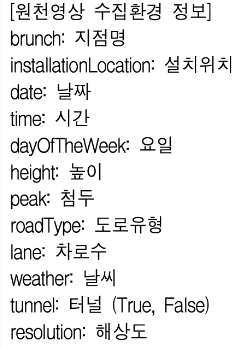

In [3]:
Image(filename='./json_key.png')

# 폴더명으로 데이터 프레임 만들기

In [4]:
def make_df(file_lists):
    brunch = []     # 지점명
    channel = []    # 설치위치
    date = []       # 날짜
    time = []       # 시간
    dofw = []       # 요일
    height = []     # 높이(설치)
    peak = []       # 첨두
    roadType = []   # 도로유형
    lane = []       # 차로수
    weather = []    # 날씨
    tunnel = []     # 터널
    # resolution = [] # 해상도

    for _ in file_lists:
        file_name = _.split('_')
        brunch.append(file_name[0])
        channel.append(file_name[1])
        date.append(file_name[2])
        time.append(file_name[3])
        dofw.append(file_name[4])
        height.append(file_name[5])
        peak.append(file_name[6])
        roadType.append(file_name[7])
        lane.append(file_name[8])
        weather.append(file_name[9])
        tunnel.append(file_name[10])
        # resolution.append(file_name[11])  
    
    df = pd.DataFrame({
        'brunch' : brunch,
        'channel' : channel,
        'date' : date,
        'time' : time,
        'dofw' : dofw,
        'height' : height,
        'peak' : peak,
        'roadType' : roadType,
        'lane' : lane,
        'weather' : weather,
        'tunnel' : tunnel,
        # 'resolution' : resolution
    })
    return df

### Validation 폴더

In [5]:
val_path = './Validation/바운딩박스/mm/[원천]1.수도권영동선/BB_01수도권영동선_Validation_image/'

file_list = os.listdir(val_path)

### Train 폴더

In [6]:
one_path = './Training/바운딩박스/mm/[원천]1-1.수도권영동선/'
two_path = './Training/바운딩박스/mm/[원천]1-2.수도권영동선/'
three_path = './Training/바운딩박스/mm/[원천]1-3.수도권영동선/'

file_list_one = os.listdir(one_path)
file_list_two = os.listdir(two_path)
file_list_three = os.listdir(three_path)

In [7]:
val_df = make_df(file_list)
train1_df = make_df(file_list_one)
train2_df = make_df(file_list_two)
train3_df = make_df(file_list_three)

In [8]:
train_df = pd.concat([train1_df, train2_df, train3_df])

In [9]:
train_df.head()

,brunch,channel,date,time,dofw,height,peak,roadType,lane,weather,tunnel
0,Suwon,CH01,20200720,1700,MON,9m,NH,highway,TW5,sunny,FHD
1,Suwon,CH01,20200720,1730,MON,9m,NH,highway,TW5,sunny,FHD
2,Suwon,CH01,20200720,1800,MON,9m,NH,highway,TW5,sunny,FHD
3,Suwon,CH01,20200720,1900,MON,9m,RH,highway,TW5,sunny,FHD
4,Suwon,CH01,20200720,1930,MON,9m,NH,highway,TW5,sunny,FHD


In [10]:
val_df.head()

,brunch,channel,date,time,dofw,height,peak,roadType,lane,weather,tunnel
0,Suwon,CH01,20200720,1830,MON,9m,RH,highway,TW5,sunny,FHD
1,Suwon,CH01,20200721,1700,TUE,9m,RH,highway,TW5,sunny,FHD
2,Suwon,CH01,20200722,1430,WED,9m,NH,highway,TW5,rainy,FHD
3,Suwon,CH01,20200722,1930,WED,9m,NH,highway,TW5,sunny,FHD
4,Suwon,CH01,20201012,1723,MON,9m,RH,highway,TW5,sunny,FHD


### 데이터 분포도 확인

#### 날씨 확인

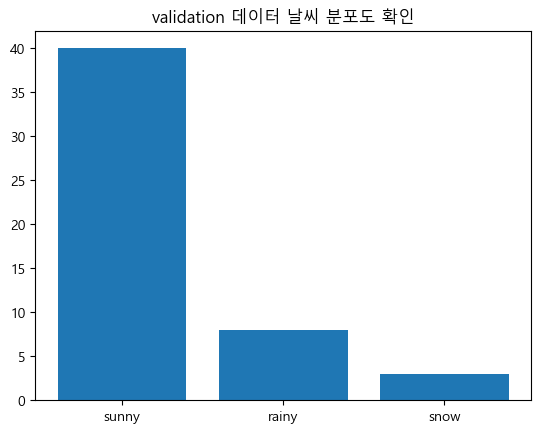

In [11]:
plt.bar(data= val_df['weather'].sort_values(ascending=False),
        x=val_df['weather'].value_counts().index,
        height=val_df['weather'].value_counts())

plt.title('validation 데이터 날씨 분포도 확인')
plt.xticks(rotation=0)  
plt.show()

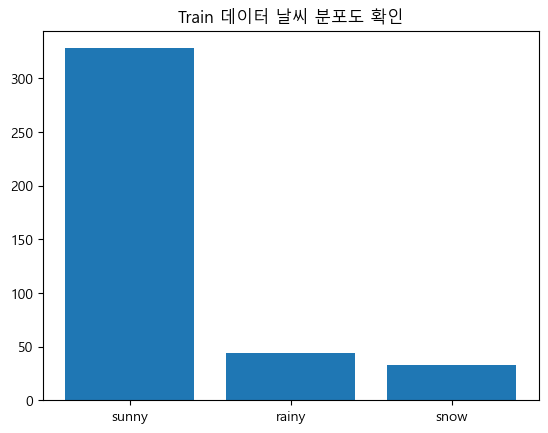

In [12]:
plt.bar(data= train_df['weather'].sort_values(ascending=False),
        x=train_df['weather'].value_counts().index,
        height=train_df['weather'].value_counts())

plt.title('Train 데이터 날씨 분포도 확인')
plt.xticks(rotation=0)  
plt.show()

#### 요일 확인

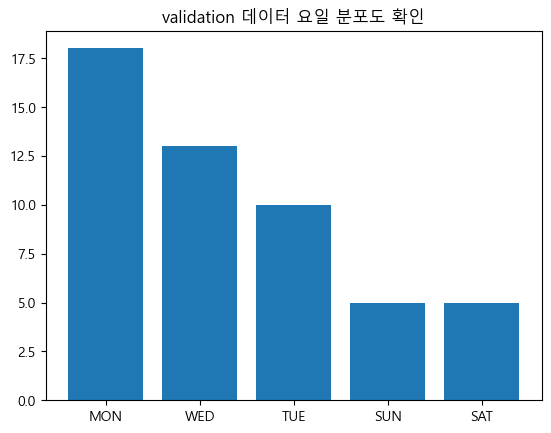

In [13]:
plt.bar(data= val_df['dofw'].sort_values(ascending=False),
        x=val_df['dofw'].value_counts().index,
        height=val_df['dofw'].value_counts())

plt.title('validation 데이터 요일 분포도 확인')
plt.xticks(rotation=0)  
plt.show()

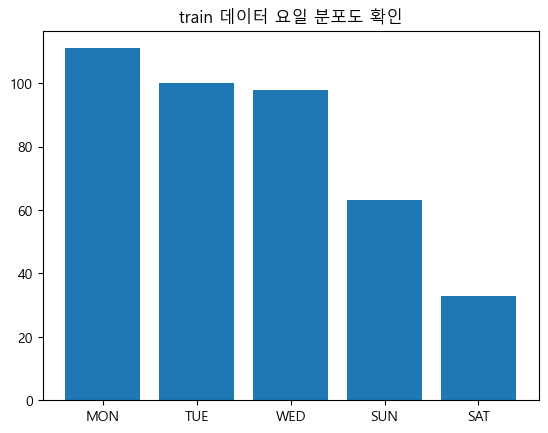

In [14]:
plt.bar(data= train_df['dofw'].sort_values(ascending=False),
        x=train_df['dofw'].value_counts().index,
        height=train_df['dofw'].value_counts())

plt.title('train 데이터 요일 분포도 확인')
plt.xticks(rotation=0)  
plt.show()

#### 채널 확인

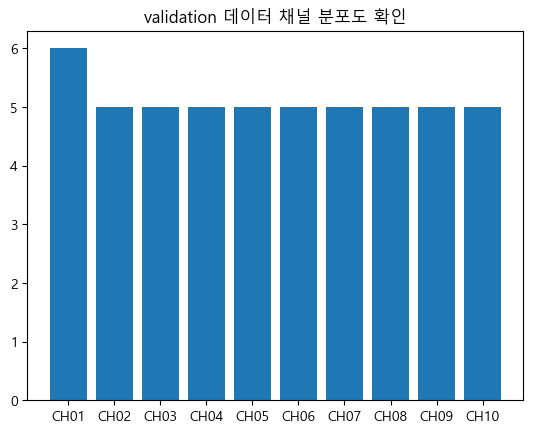

In [15]:
plt.bar(data= val_df['channel'].sort_values(ascending=False),
        x=val_df['channel'].value_counts().index,
        height=val_df['channel'].value_counts())

plt.title('validation 데이터 채널 분포도 확인')
plt.xticks(rotation=0)  
plt.show()

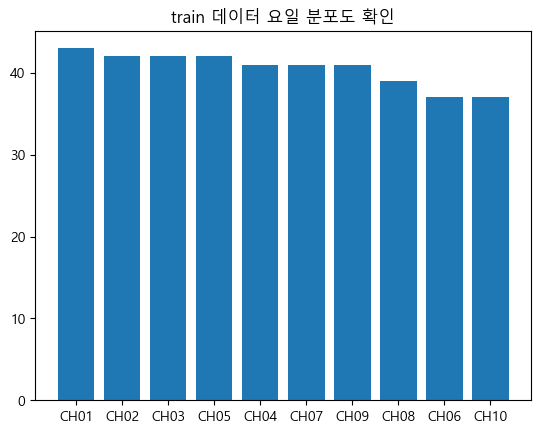

In [16]:
plt.bar(data= train_df['channel'].sort_values(ascending=False),
        x=train_df['channel'].value_counts().index,
        height=train_df['channel'].value_counts())

plt.title('train 데이터 요일 분포도 확인')
plt.xticks(rotation=0)  
plt.show()

#### 시간대 별 확인

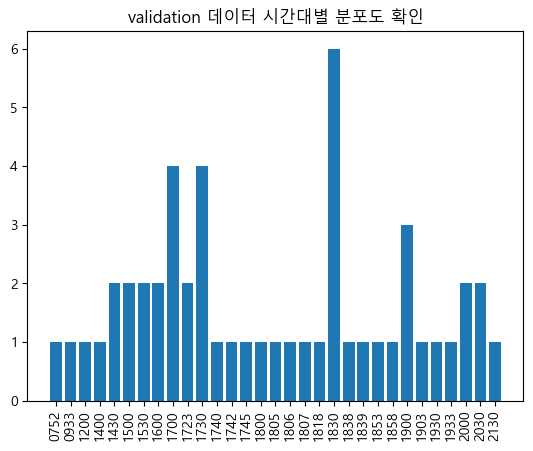

In [27]:
plt.bar(data= val_df['time'].value_counts().sort_index(),
        x=val_df['time'].value_counts().sort_index().index,
        height=val_df['time'].value_counts().sort_index())

plt.title('validation 데이터 시간대별 분포도 확인')
plt.xticks(rotation=90)  
plt.show()

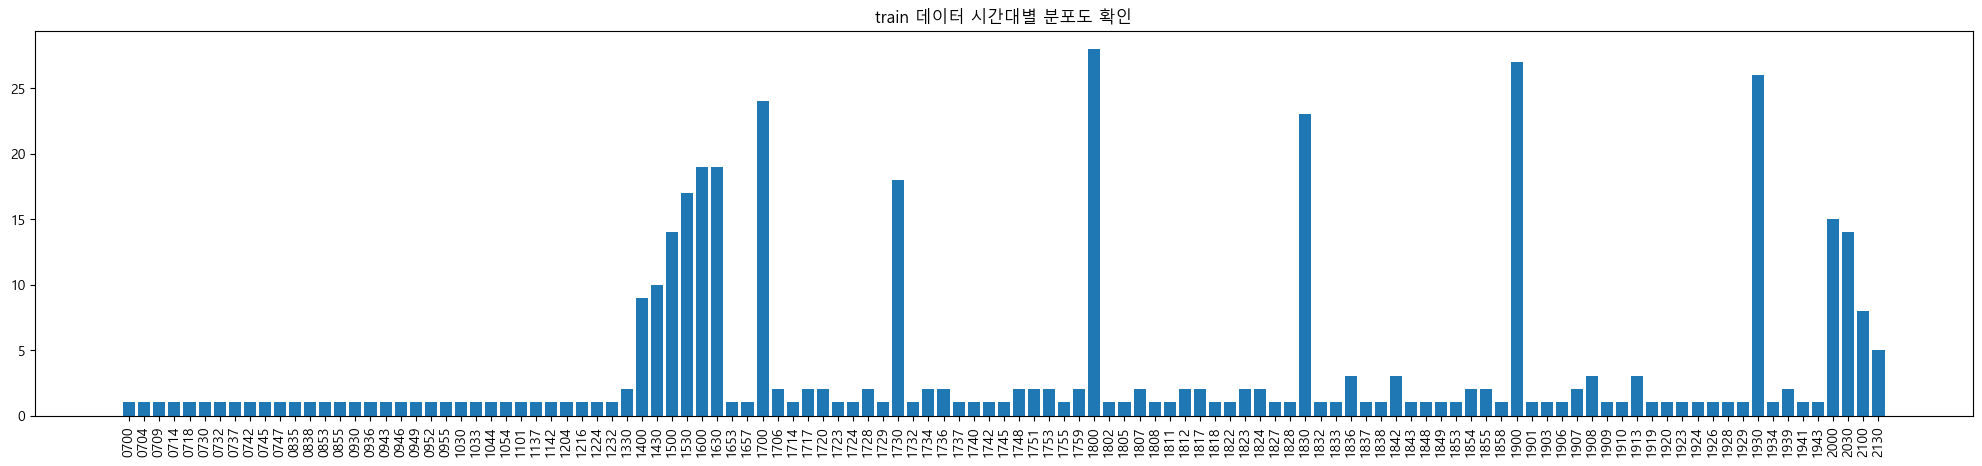

In [34]:
plt.figure(figsize=(25, 5))
plt.bar(data= train_df['time'].value_counts().sort_index(),
        x=train_df['time'].value_counts().sort_index().index,
        height=train_df['time'].value_counts().sort_index())

plt.title('train 데이터 시간대별 분포도 확인')
plt.xticks(rotation=90)  
plt.show()